<a href="https://colab.research.google.com/github/loroldoesmath/intro-to-ML/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In this notebook, we will explore how to use a decision tree to predict the likelihood of a particular outcome based on specific features in a dataset.

Decision trees are a type of supervised machine learning algorithm that makes predictions by learning simple decision rules from the data. They are highly interpretable and can handle both categorical and numerical data.

For this notebook, we will focus on predicting whether an individual has lung cancer using features such as gender, age, yellow_fingers, anxiety, fatigue, and more. Our goal is to train a decision tree classifier that can identify patterns in the data and use them to predict outcomes for new, unseen individuals.

Specifically, we will:

- Define the question
- Load and explore the dataset to understand the distribution of features and the target variable.
- Train a DecisionTreeClassifier using scikit-learn and evaluate its performance.
- Visualize the decision tree to understand how it makes predictions.
- Analyze the model's accuracy.

## Set Up and Preprocessing

### Our Dataset
💾 For this project, we'll be using the [Lung Cancer Prediction](https://www.kaggle.com/code/sandragracenelson/lung-cancer-prediction?select=survey+lung+cancer.csv) dataset. Once we upload the data set, let's take a look at the first few rows and clarify our problem.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving survey_lung_cancer.csv to survey_lung_cancer.csv


In [ ]:
import pandas as pd

df = pd.read_csv('survey_lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Let's also import some of the other libraries we'll be using throughout this notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing

Let's check for and drop duplicates, check for null values.

Then, since we have categorical variables such as `Gender` and `LUNG_CANCER`, let's use LabelEncoder() to encode these.

It also seems that this data set has YES = 2 and NO = 1, which we'll standardize as YES = 1 and NO = 0.

✅ Try it yourself: Check for and drop any duplicates. Then check for null values.

In [ ]:
# Your Code Here - How Many Duplicates Are There?
df.duplicated().sum()

33

In [ ]:
# Your Code Here - Drop Any Duplicates
df = df.drop_duplicates()

In [ ]:
# Your Code Here - Check for Null Values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
# Encode and Normalize Categorical Variables Using LabelEncoder()

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

# Check DataFrame is Properly Encoded
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Now, let's check the distrubution of the Target variable.

<ipython-input-19-b934382a091b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'LUNG_CANCER', data = df, palette = 'Set2')


Text(0.5, 1.0, 'Target Distribution')

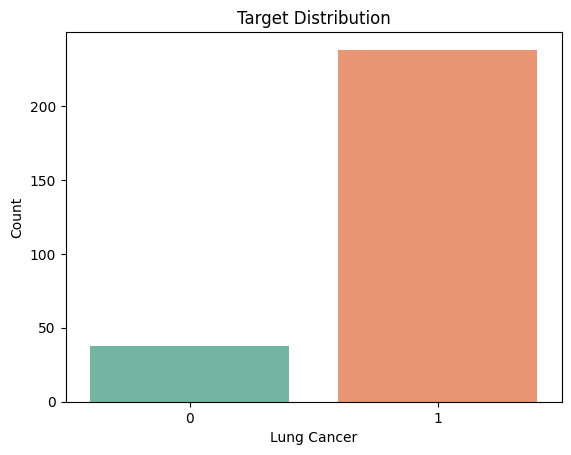

In [ ]:
sns.countplot(x = 'LUNG_CANCER', data = df, palette = 'Set2')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.title('Target Distribution')

❓ Question: Is our target distribution *balanced* or *unbalanced*?

Next, let's split our data into independent and dependent variables and then into training and test sets with 75% of data going toward training.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into independent variables (features) and dependent variables (target)
X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model Implementation and Evaluation



Our goal for our model is to predict lung cancer given features such as fatigue, allergies, whether a patient consumes alcohol, etc.

Our decision tree will predict whether someone has lung cancer by splitting the dataset into smaller groups based on the features (like gender, age, yellow_fingers, anxiety, etc.). It starts at the top with all the data and chooses the feature that best separates people with and without lung cancer (e.g., yellow_fingers might be the most telling). It then creates a branch for each possible value of that feature. For each branch, it repeats the process, picking the next best feature to split the data further. This continues until the tree has reached pure groups (where everyone in a group has the same lung cancer outcome) or a stopping condition. When you input new data, the decision tree follows these splits to predict whether that person has lung cancer.

To start creating our classification tree, we need to import `DecisionTreeClassifier` from `sklearn.tree`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Recall that for every model we implement in `sklearn`, the sequence is:

1. Import the model from `sklearn` (which we did in the previous cell).
2. Instantiate the model.
3. Fit the model to the data.
4. Predict results using testing data.


In [ ]:
# Instantiate the model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

# Fit the model
dt.fit(X_train, y_train)

# Predict results using test data
y_dt_pred = dt.predict(X_test)
y_dt_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

Let's see how well our model is performing. We'll use the `classification_report` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.86      1.00      0.93        56

    accuracy                           0.87        69
   macro avg       0.93      0.65      0.70        69
weighted avg       0.89      0.87      0.84        69



### Analyzing Our Results

Recall that we can use the following guidelines to assess our model's accuracy:

Greater than 90% Accuracy: Often considered excellent, but only if the baseline (the performance you’d expect by always predicting the majority class) isn't close to this.
70-90% Accuracy: Typically good for many practical applications.
Less Than 70% Accuracy: Might be acceptable for very challenging problems or noisy datasets, but improvement is usually desired.

Though our model seems to be in the "Typically good for many practical applications" category, let's see what our baseline accuracy is.

In [ ]:
baseline_accuracy = df['LUNG_CANCER'].value_counts(normalize=True).max()

print(f"Baseline Accuracy: {baseline_accuracy:.2%}")

Baseline Accuracy: 86.23%


As we can see, our accuracy is barely higher than the baseline accuracy. This is a sign that we need to improve upon our model.

👻 Remember: We asked earlier if our target distribution was balanced or unbalanced, and we could see from the bar chart that there was a skew towards records without lung cancer, meaning our target distribution was unbalanced. This could be a source of some inaccuracy.

### Mitigating an Unbalanced Target Distribution

For classification problems in general, a highly unbalanced target can pose difficulties, such as bias toward the majority class, poor generalization for the minority class, or overfitting. `DecisionTreeClassifier()` has a `class_weight` parameter that we can set to `'balanced'`:

`clf = DecisionTreeClassifier(class_weight='balanced')`

✅ Try it yourself: Instantiate a new `DecisionTreeClassifier` with a balanced class weight, fit the model to the training data, use your new model to make predictions, and print the classification report.

In [ ]:
dt_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt_balanced.fit(X_train, y_train)

y_dt_balanced_pred = dt_balanced.predict(X_test)

print(classification_report(y_test, y_dt_balanced_pred))

              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.87      0.98      0.92        56

    accuracy                           0.87        69
   macro avg       0.85      0.68      0.73        69
weighted avg       0.87      0.87      0.85        69



❓ Question: Which metrics improved? Which didn't?

## Comparing Different Classification Models

🤺 Challenge: Use the same dataset to train and test a Logistic Regression model. Which classification method, Decision Trees or Logistic Regression, is more accurate when it comes to predicting lung cancer?

In [ ]:
# Your Code Here

## Conclusion

In this notebook, we explored how decision trees can be used for classification tasks. We learned how the tree splits the dataset based on features to create decision boundaries, evaluated its performance using metrics like accuracy, precision, and recall, and visualized the tree to understand how it makes predictions. Decision trees are a powerful, interpretable machine learning tool, particularly useful for datasets with clear, rule-based patterns.

One of the strengths of decision trees for classification is their ability to handle both numerical and categorical data while requiring minimal preprocessing. However, they can be prone to overfitting, especially on noisy or complex datasets, and may need pruning or parameter tuning for better generalization.

Looking forward, decision trees are not limited to classification tasks—they can also be applied to regression problems. Instead of predicting discrete class labels, regression trees predict continuous values by minimizing the variance within splits. In our next session, we’ll explore into how decision trees perform regression, using similar concepts but adapting them to continuous outcomes.

📑 Sources:

This notebook was inspired by Sandra Grace Nelson's [Lung Cancer Prediction Notebook](https://www.kaggle.com/code/sandragracenelson/lung-cancer-prediction/notebook#Decision-Tree). Sandra's notebook contains nine additional ML classification methods for use in machine learning, so if you'd like to see how different classificiation models stack up against each other, this is a great resource.